# Perceptrón Multicapa: Caso práctico I

## Dataset

El conjunto de datos flor Iris o conjunto de datos iris de Fisher es un conjunto de datos multivariante introducido por Ronald Fisher en su artículo de 1936, _The use of multiple measurements in taxonomic problems_ (El uso de medidas múltiples en problemas taxonómicos) como un ejemplo de análisis discriminante lineal. A veces, se llama Iris conjunto de datos de Anderson porque Edgar Anderson coleccionó los datos para cuantificar la variación morfológica de la flor Iris de tres especies relacionadas. Dos de las tres especies se coleccionaron en la Península de la Gaspesia «todos son de la misma pastura, y recolectado el mismo día y medidos al mismo tiempo por la misma persona con el mismo aparato».

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

## Enunciado

En este ejercicio vamos utilizar el conjunto de datos Iris para evaluar el funcionamiento del perceptrón y visualizar las capacidades que nos proporciona a la hora de clasificar diferentes categorías dentro de un conjunto de datos.

## 1. Lectura del conjunto de datos

In [1]:
from sklearn.datasets import load_iris

In [2]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [3]:
iris_dataset["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
dir(iris_dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Visualizamos las etiquetas del conjunto de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np


df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
                  columns= iris_dataset['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2. Visualización del conjunto de datos

In [8]:
df = df.loc[df["target"] == 0]
df["petal width (cm)"]


0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
5     0.4
6     0.3
7     0.2
8     0.2
9     0.1
10    0.2
11    0.2
12    0.1
13    0.1
14    0.2
15    0.4
16    0.4
17    0.3
18    0.3
19    0.3
20    0.2
21    0.4
22    0.2
23    0.5
24    0.2
25    0.2
26    0.4
27    0.2
28    0.2
29    0.2
30    0.2
31    0.4
32    0.1
33    0.2
34    0.2
35    0.2
36    0.2
37    0.1
38    0.2
39    0.2
40    0.3
41    0.3
42    0.2
43    0.6
44    0.4
45    0.3
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal width (cm), dtype: float64

In [9]:
columna_filtrada = df.loc[df["petal width (cm)"]>1]
columna_filtrada


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
columna_filtrada = df["sepal length (cm)"]
columna_filtrada

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [11]:
columna_filtrada = df.loc[df["petal length (cm)"]>1.3, "target"]
columna_filtrada

0      0.0
1      0.0
3      0.0
4      0.0
5      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 139, dtype: float64

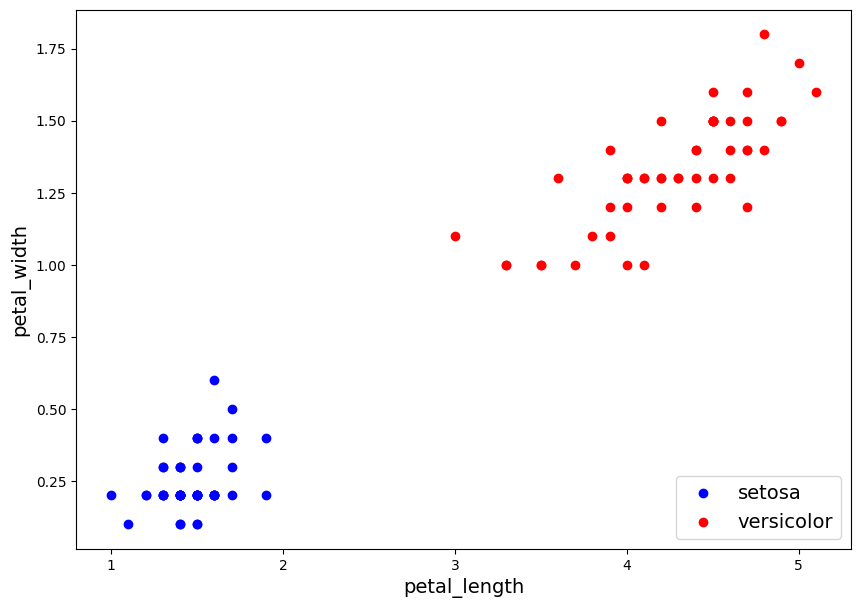

In [12]:
# Representacion grafica de dos dimensiones del conjunto de datos
import matplotlib.pyplot as plt

#Me quedo con las filas
df_filas = df.loc[df["target"] == 0]
df_filas = df_filas["petal length (cm)"]

#columna_filtrada = df.loc[df["target"] == 0, "petal length (cm)"]
#columna_filtrada

fig = plt.figure(figsize=(10, 7))

#x= df["petal length (cm)"][df["target"] == 0]
x = df_filas
plt.scatter(x,
            df["petal width (cm)"][df["target"] == 0], c="b", label="setosa")

plt.scatter(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1], c="r", label="versicolor")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()

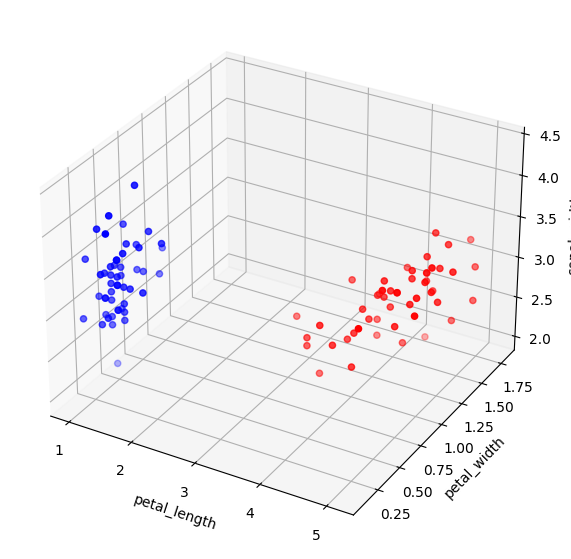

In [13]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")


plt.show()

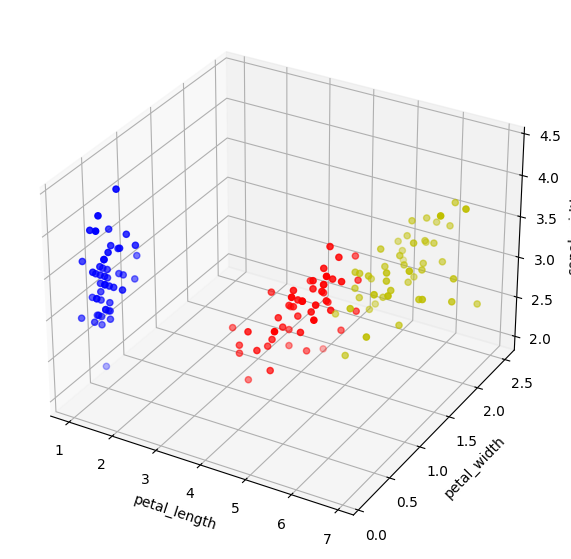

In [14]:
# Representacion grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")

ax.scatter3D(df["petal length (cm)"][df["target"] == 0],
            df["petal width (cm)"][df["target"] == 0],
            df["sepal width (cm)"][df["target"] == 0], c="b")

ax.scatter3D(df["petal length (cm)"][df["target"] == 1],
            df["petal width (cm)"][df["target"] == 1],
            df["sepal width (cm)"][df["target"] == 1], c="r")

ax.scatter3D(df["petal length (cm)"][df["target"] == 2],
            df["petal width (cm)"][df["target"] == 2],
            df["sepal width (cm)"][df["target"] == 2], c="y")

ax.set_xlabel("petal_length")
ax.set_ylabel("petal_width")
ax.set_zlabel("sepal_width")

plt.show()

## 3. Entrenamiento del algoritmo

In [32]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
df_prueba=df["petal length (cm)"]
df_prueba

df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [16]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
y_df = df_reduced["target"]

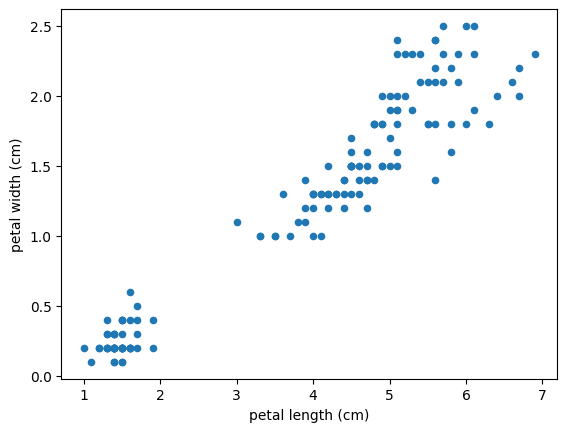

In [17]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

### 3.1 Perceptrón Simple

In [18]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000, random_state=40)
clf.fit(X_df, y_df)

Perceptron(random_state=40)

 La longitud de los valores son 0.9 0.0
 La longitud de los valores son 7.0 2.6
[0.9        0.90610611 0.91221221 0.91831832 0.92442442 0.93053053
 0.93663664 0.94274274 0.94884885 0.95495495 0.96106106 0.96716717
 0.97327327 0.97937938 0.98548549 0.99159159 0.9976977  1.0038038
 1.00990991 1.01601602 1.02212212 1.02822823 1.03433433 1.04044044
 1.04654655 1.05265265 1.05875876 1.06486486 1.07097097 1.07707708
 1.08318318 1.08928929 1.0953954  1.1015015  1.10760761 1.11371371
 1.11981982 1.12592593 1.13203203 1.13813814 1.14424424 1.15035035
 1.15645646 1.16256256 1.16866867 1.17477477 1.18088088 1.18698699
 1.19309309 1.1991992  1.20530531 1.21141141 1.21751752 1.22362362
 1.22972973 1.23583584 1.24194194 1.24804805 1.25415415 1.26026026
 1.26636637 1.27247247 1.27857858 1.28468468 1.29079079 1.2968969
 1.303003   1.30910911 1.31521522 1.32132132 1.32742743 1.33353353
 1.33963964 1.34574575 1.35185185 1.35795796 1.36406406 1.37017017
 1.37627628 1.38238238 1.38848849 1.39459459 1.4007

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


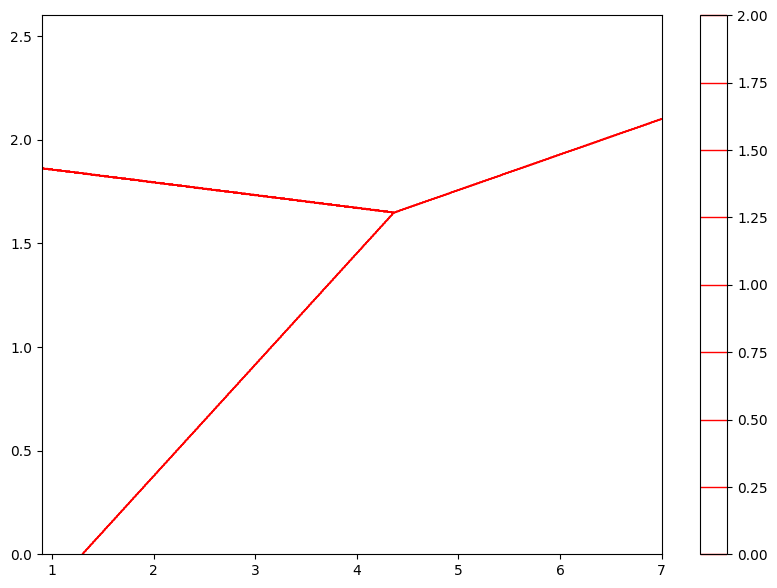

In [19]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

print(" La longitud de los valores son", mins[0], mins[1])
print(" La longitud de los valores son", maxs[0], maxs[1])

kk = np.linspace(mins[0], maxs[0], 1000)
print(kk)

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

print("xx", xx.shape)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print("Aplanada Z", Z)
Z = Z.reshape(1000,1000)
print("Sin aplanar Z", Z)

fig = plt.figure(figsize=(10, 7))

# plt.contourf(xx, yy, Z, cmap="Set3")

plt.contour(xx, yy,Z, linewidths=1, colors='r')

# plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
# plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
# plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

# plt.xlabel("petal_length", fontsize=14)
# plt.ylabel("petal_width", fontsize=14)
# plt.legend(loc="lower right", fontsize=14)
plt.colorbar()
plt.show()

El código que has proporcionado se encarga de preparar una cuadrícula de valores para crear un gráfico de la región de decisión de un clasificador. Vamos a desglosar cada parte:

mins = X.min(axis=0) - 0.1: Esta línea calcula el valor mínimo en cada columna (característica) de la matriz X y luego resta 0.1 a cada uno de estos valores. El propósito de esto es obtener valores mínimos ligeramente menores para crear un margen adicional alrededor de los límites de las características. Esto es útil para asegurarse de que la región de decisión se extienda un poco más allá de los puntos de datos en el gráfico.

maxs = X.max(axis=0) + 0.1: Similar a la línea anterior, esta línea calcula el valor máximo en cada columna de la matriz X y luego agrega 0.1 a cada uno de estos valores. El propósito es obtener valores máximos ligeramente mayores para crear un margen adicional alrededor de los límites de las características. Esto también ayuda a que la región de decisión se extienda más allá de los puntos de datos.

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000), np.linspace(mins[1], maxs[1], 1000)): Aquí, se crea una cuadrícula bidimensional utilizando la función np.meshgrid. Se generan dos matrices xx y yy que contienen los puntos de la cuadrícula en los ejes x e y. La función np.linspace se utiliza para crear un rango de valores en el intervalo entre los valores mínimos y máximos ajustados con un total de 1000 puntos en cada dirección (en este caso, en los ejes x e y).

En resumen, este código prepara una cuadrícula de valores en el espacio de características que se utilizará para predecir y visualizar la región de decisión de un clasificador. Los valores mínimos y máximos ajustados con un pequeño margen aseguran que la región de decisión se extienda un poco más allá de los puntos de datos en el gráfico.

### 3.2 Perceptrón Multicapa

In [20]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_df, y_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [21]:
# Número de capas del perceptrón multicapa|
clf.n_layers_

3

In [22]:
clf.hidden_layer_sizes

(100,)

In [23]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_

3

In [24]:
# Número de parámetros que forman el modelo
clf.coefs_[1].shape

(100, 3)

In [25]:
# z1(x) = x1*w1,1 + x2*w2,1 + b1
# ...
# z100(x) = x1*w1,100 + x2*w2,100 + b100

In [26]:
clf.intercepts_[1]

array([ 0.17490281,  0.11915696, -0.23346218])

In [27]:
X_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


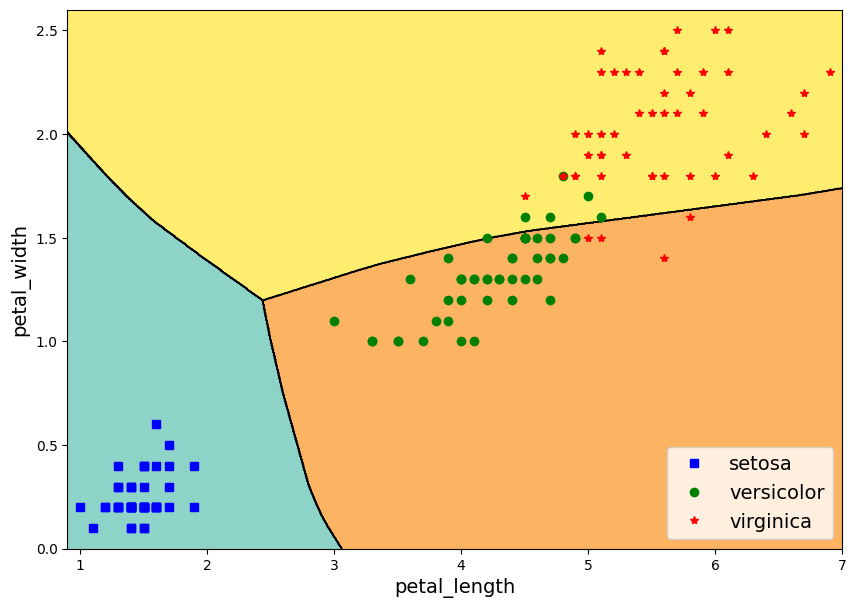

In [28]:
# Representacion grafica del limite de decision
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap="Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label="setosa")
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label="versicolor")
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)

plt.show()